In [1]:
cd /content/drive/My Drive/AML/HW1/Assignment/Filtering

/content/drive/My Drive/AML/HW1/Assignment/Filtering


In [0]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2
import matplotlib.pyplot as plt

#import gauss_module
# import packages: numpy, math (you might need pi for gaussian functions)
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.signal import convolve2d as conv2

# a - 1D Gaussian Filter

In [0]:
"""
Gaussian function taking as argument the standard deviation sigma
The filter should be defined for all integer values x in the range [-3sigma,3sigma]
The function should return the Gaussian values Gx computed at the indexes x
"""
def gauss(sigma):
    x = np.linspace(-3*sigma, 3*sigma, 25)
    var = (x**2) / (2*sigma**2)
    Gx = (1 / (np.sqrt(2*math.pi) * sigma)) * np.exp(-var) # Gaussian formula for 1 variable
    #Gx /= np.trapz(Gx) # normalize the integral to 1
    return Gx, x

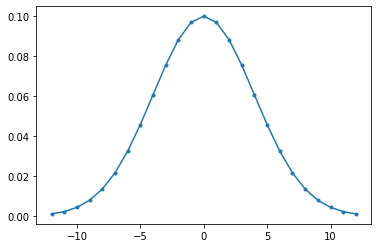

In [27]:
## function gauss (Question 1.a)
sigma = 4.0
#[Gx, x] = gauss_module.gauss(sigma)
[Gx, x] = gauss(sigma)

plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

# b - 2D Gaussian Filter

In [0]:
# if have time try convolve1d maybe its faster or implement it yourself
"""
Implement a 2D Gaussian filter, leveraging the previous gauss.
Implement the filter from scratch or leverage the convolve2D method (scipy.signal)
Leverage the separability of Gaussian filtering
Input: image, sigma (standard deviation)
Output: smoothed image
"""
def gaussianfilter(img, sigma):
    # 2D kernel made from multiplication of 2 1D kernels
    Gx = gauss(sigma)[0] # 1D filter
    Gxy = np.outer(Gx,Gx) # 2D filter
    # to speed up computations, decrease number of x points in gauss function
    smooth_img = conv2(img,Gxy,mode='same')
    return smooth_img

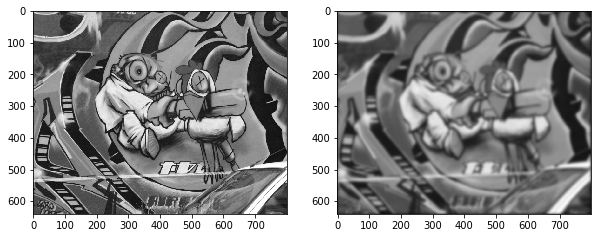

In [29]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
    
## function gaussianfilter (Question 1.b)
img = rgb2gray(np.array(Image.open('graf.png')))
#smooth_img = gauss_module.gaussianfilter(img, sigma)
smooth_img = gaussianfilter(img, sigma)
#plt.figure(2)
plt.figure(2,figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

# c - Gaussian derivative 1D

In [0]:
"""
Gaussian derivative function taking as argument the standard deviation sigma
The filter should be defined for all integer values x in the range [-3sigma,3sigma]
The function should return the Gaussian derivative values Dx computed at the indexes x
"""
def gaussdx(sigma):
    x = np.linspace(-3*sigma, 3*sigma, 25)
    var = (x**2) / (2*sigma**2)
    var1 = (1 / (np.sqrt(2*math.pi) * sigma**3))
    Dx = -var1 * x * np.exp(-var) # 1st derivative
    return Dx, x

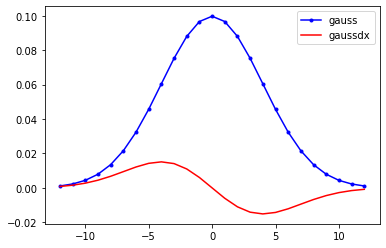

In [31]:
## function gaussdx (Question 1.c)

sigma = 4.0
#[Gx, x] = gauss_module.gauss(sigma)
#[Dx, x] = gauss_module.gaussdx(sigma)
[Gx, x] = gauss(sigma)
[Dx, x] = gaussdx(sigma)
plt.figure(5)
plt.plot(x, Gx, 'b.-')
plt.plot(x, Dx, 'r-')
plt.legend( ('gauss', 'gaussdx'))
plt.show()

# d - Filters applying

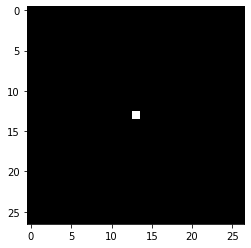

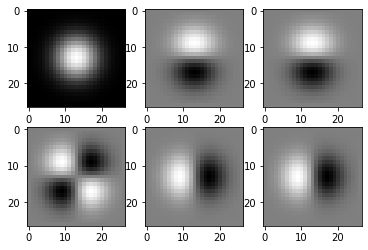

In [32]:
## function gaussdx (Question 1.d)

img_imp = np.zeros([27,27])
img_imp[13, 13] = 1.0
plt.figure(6), plt.imshow(img_imp, cmap='gray')

sigma = 7.0
#[Gx, x] = gauss_module.gauss(sigma)
#[Dx, x] = gauss_module.gaussdx(sigma)
[Gx, x] = gauss(sigma)
[Dx, x] = gaussdx(sigma)

Gx = Gx.reshape(1, Gx.size)
Dx = Dx.reshape(1, Dx.size)

plt.figure(7)
plt.subplot(2,3,1)
plt.imshow(conv2(conv2(img_imp, Gx, 'same'), Gx.T, 'same') , cmap='gray')
plt.subplot(2,3,2)
plt.imshow(conv2(conv2(img_imp, Gx, 'same'), Dx.T, 'same') , cmap='gray')
plt.subplot(2,3,3)
plt.imshow(conv2(conv2(img_imp, Dx.T, 'same'), Gx, 'same') , cmap='gray')
plt.subplot(2,3,4)
plt.imshow(conv2(conv2(img_imp, Dx, 'same'), Dx.T, 'same') , cmap='gray')
plt.subplot(2,3,5)
plt.imshow(conv2(conv2(img_imp, Dx, 'same'), Gx.T, 'same') , cmap='gray')
plt.subplot(2,3,6)
plt.imshow(conv2(conv2(img_imp, Gx.T, 'same'), Dx, 'same') , cmap='gray')
plt.show()

# e - Two copies

In [0]:
def gaussderiv(img, sigma):
    Gx = gauss(sigma)[0] # Gaussian 1D filter
    Dx = gaussdx(sigma)[0] # Gaussian x-derivative 1D filter
    Gx = Gx.reshape(1, Gx.size)
    Dx = Dx.reshape(1, Gx.size)
    Dy = Dx.T # Gaussian y-derivative 1D filter

    # image smoothed with std sigma and derived in x and y directions
    imgDx = conv2(conv2(img, Gx, 'same'), Dx, 'same')
    imgDy = conv2(conv2(img, Gx, 'same'), Dy, 'same')
    return imgDx, imgDy

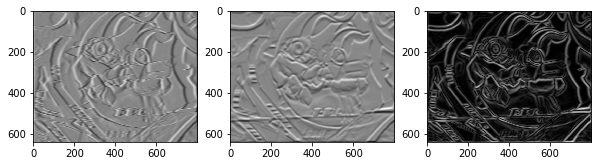

In [34]:
## function gaussderiv (Question 1.e)
img_c = np.array(Image.open('graf.png')).astype('double')
img = rgb2gray(img_c)
#[imgDx, imgDy] = gauss_module.gaussderiv(img, 7.0)
[imgDx, imgDy] = gaussderiv(img, 7.0)

plt.figure(8,figsize=(10,10))
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
plt.sca(ax1)
plt.imshow(imgDx, cmap='gray')
plt.sca(ax2)
plt.imshow(imgDy, cmap='gray')
plt.sca(ax3)
imgmag = np.sqrt(imgDx**2 + imgDy**2)
plt.imshow(imgmag, cmap='gray')
plt.show()

# NOT USED

In [0]:
#q1 -b 2d gaussian proper implementation - not used
r0 = img[0]
img_w = len(r0)
G_kernel = np.asarray(Gx)
ker_c = math.ceil(len(G_kernel)/2)-1
for idx in range(0,img_w):
    ker = kernel_window(idx,img_w,G_kernel)
    print(idx, ker)
    print(len(ker))
    print(len(r0[idx-1:idx+ker_c+1]))
    break

########################
G_horiz_img = np.zeros(img.shape) # to save convolved values when applying 1D filter horizontally
G1_kernel = np.asarray(Gx)
ker_c = math.ceil(len(G1_kernel)/2)-1 # central element of full 1D kernel
for row_idx in range(img.shape[0]):
    for col_idx in range(0,img.shape[1]+1)
        if col_idx in [0,img.shape[1]]: # preserve vertical boarders
        G_horiz_img[row_idx,col_idx] = img[row_idx,col_idx]
        else:
            active_kernel = kernel_window(col_idx,img.shape[1],G1_kernel)



        for idx in range(0,img_w):
    ker = kernel_window(idx,img_w,G_kernel)
    print(idx, ker)
    print(len(r0[idx-1:idx+ker_c+1]))
    break

##########################
# function for kernel window size
def kernel_window(idx, img_w, G_kernel):
    ker_c = math.ceil(len(G_kernel)/2)-1 # idx center of kernel 48
    if idx <= ker_c: #48
        kernel = G_kernel[ker_c - (idx):] # increasing left side of the kernel window
    elif (idx > ker_c) & (idx <= img_w-(ker_c)): # if full window fits, do nothing
        kernel = G_kernel
    elif idx > img_w-(ker_c): # if right part of window doest fit, decrease it
        kernel = G_kernel[:ker_c+(img_w-idx)+1]
    else:
        print('INDEX IS STRANGE')
    return kernel